## **CLASSIFICATION of Diabetic Retinopathy using CUSTOM CNN and TRANSFER LEARNING**

![Static Badge](https://img.shields.io/badge/Made%20By-SHREENANDAN%20SAHU-5a189a?style=flat-square) ![Static Badge](https://img.shields.io/badge/Project%20Category-CNN-a53860?style=flat-square) 

![image.png](./results/thumbnail.png)






### Imported all the required basic files 

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Seting the file directories and doing the basic image agumentation

In [23]:
# paths of different splited folders
train_dir = "drp/dataset/train"
val_dir = "drp/dataset/val"
test_dir = "drp/dataset/test"

# Data augmentation generating multiple copies to improve generality
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation & test data: only rescaling
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Train set
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Validation set
val_set = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Test set
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 2573 images belonging to 5 classes.
Found 549 images belonging to 5 classes.
Found 555 images belonging to 5 classes.


### Custom dense layer for CNN feature extraction

In [35]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalMaxPooling2D, Dense, Dropout
from tensorflow.keras.models import Model

inputs = Input(shape=(224, 224, 3))

x = Conv2D(64, (5, 5), activation='relu')(inputs)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(64, (5, 5), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(128, (5, 5), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(512, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(1024, (1, 1), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)

x = GlobalMaxPooling2D()(x)

dense1 = Dense(1024, activation='relu')(x)
drop = Dropout(0.5)(dense1)

outputs = Dense(train_set.num_classes, activation='softmax')(drop)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


### Training of the model

In [36]:
history = model.fit(
    train_set,
    validation_data=val_set,
    epochs=10
)

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.5449 - loss: 1.1947 - val_accuracy: 0.6794 - val_loss: 0.9229
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.6619 - loss: 0.9863 - val_accuracy: 0.6576 - val_loss: 0.9386
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.6627 - loss: 0.9806 - val_accuracy: 0.6794 - val_loss: 0.9173
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.6759 - loss: 0.9426 - val_accuracy: 0.7177 - val_loss: 0.8219
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.6840 - loss: 0.9513 - val_accuracy: 0.6794 - val_loss: 0.8988
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.6902 - loss: 0.9025 - val_accuracy: 0.7104 - val_loss: 0.8388
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.7000 - loss: 0.8865 - val_accuracy: 0.7268 - val_loss: 0.8090
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.6945 - loss: 0.8890 - val_accuracy: 0.6976 - val_loss

### Feature extraction 

In [37]:
x_batch, y_batch = next(iter(train_set))
model(x_batch)


<tf.Tensor: shape=(32, 5), dtype=float32, numpy=
array([[1.98830315e-03, 3.02161113e-03, 9.94433343e-01, 5.42562164e-04,
        1.41770179e-05],
       [3.49508673e-02, 9.26418379e-02, 8.45142603e-01, 2.23269537e-02,
        4.93767438e-03],
       [1.41803488e-01, 4.78506416e-01, 1.36953801e-01, 1.42318591e-01,
        1.00417651e-01],
       [1.08549118e-01, 2.91250110e-01, 3.72047603e-01, 1.38583362e-01,
        8.95698369e-02],
       [3.65718938e-02, 5.51883578e-02, 8.83432329e-01, 2.13247258e-02,
        3.48269986e-03],
       [1.41917425e-03, 3.05067538e-03, 9.95119095e-01, 4.00318386e-04,
        1.07976030e-05],
       [1.62771940e-01, 5.48587263e-01, 6.81334287e-02, 1.28818393e-01,
        9.16889831e-02],
       [9.48762968e-02, 2.99774230e-01, 3.87521982e-01, 1.36575028e-01,
        8.12524781e-02],
       [2.77750026e-02, 4.36516069e-02, 9.11830366e-01, 1.49145843e-02,
        1.82843045e-03],
       [1.66044921e-01, 5.79592168e-01, 4.02885862e-02, 1.24816999e-01,
      

In [39]:
from tensorflow.keras.models import Model
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Build model input/output if not built yet
model.build(input_shape=(None, 224, 224, 3))

# Create feature extractor from Dense(1024) layer before dropout
feature_extractor = Model(inputs=model.input, outputs=model.layers[-3].output)

def extract_features_labels(dataset, feature_model):
    features = []
    labels = []
    for i in range(len(dataset)):
        x_batch, y_batch = dataset[i]
        feats = feature_model.predict(x_batch)
        features.append(feats)
        labels.append(y_batch)
    features = np.vstack(features)
    labels = np.vstack(labels)
    return features, labels

# Extract features
train_features, train_labels = extract_features_labels(train_set, feature_extractor)
val_features, val_labels = extract_features_labels(val_set, feature_extractor)

# Convert one-hot labels to class indices
train_labels_int = np.argmax(train_labels, axis=1)
val_labels_int = np.argmax(val_labels, axis=1)





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

### Results and Conclusion

SVM Validation Accuracy: 0.7176684881602914


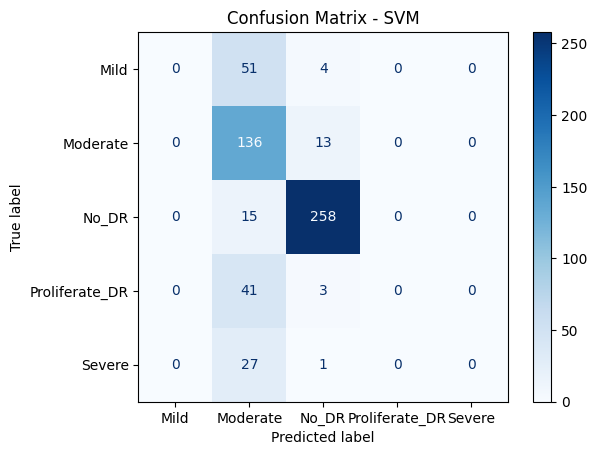

In [40]:
# Train SVM
svm_clf = SVC(kernel='rbf', gamma='scale')
svm_clf.fit(train_features, train_labels_int)
val_preds_svm = svm_clf.predict(val_features)
print("SVM Validation Accuracy:", accuracy_score(val_labels_int, val_preds_svm))

# Confusion matrix SVM
cm_svm = confusion_matrix(val_labels_int, val_preds_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=list(train_set.class_indices.keys()))
disp_svm.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - SVM")
plt.show()


Random Forest Validation Accuracy: 0.7194899817850637


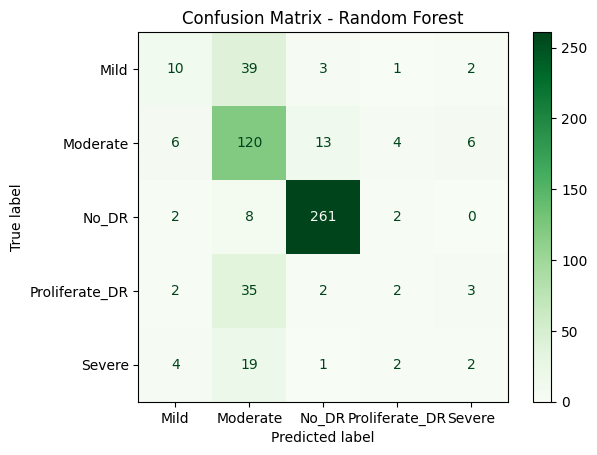

In [41]:
# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(train_features, train_labels_int)
val_preds_rf = rf_clf.predict(val_features)
print("Random Forest Validation Accuracy:", accuracy_score(val_labels_int, val_preds_rf))

# Confusion matrix RF
cm_rf = confusion_matrix(val_labels_int, val_preds_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=list(train_set.class_indices.keys()))
disp_rf.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

def calculate_metrics(true_labels, pred_labels, average='weighted'):
    acc = accuracy_score(true_labels, pred_labels)
    prec = precision_score(true_labels, pred_labels, average=average)
    rec = recall_score(true_labels, pred_labels, average=average)
    f1 = f1_score(true_labels, pred_labels, average=average)
    
    # Specificity calculation for multiclass: calculate per-class specificity and average
    cm = confusion_matrix(true_labels, pred_labels)
    tn = []
    fp = []
    for i in range(len(cm)):
        temp_cm = np.delete(np.delete(cm, i, axis=0), i, axis=1)
        tn.append(temp_cm.sum())
        fp.append(cm[:, i].sum() - cm[i, i])
    specificity = np.mean([tn[i] / (tn[i] + fp[i]) for i in range(len(tn))])
    
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall (Sensitivity): {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Specificity: {specificity:.4f}")
    
    return acc, prec, rec, f1, specificity

# Example for SVM predictions
print("Metrics for SVM:")
calculate_metrics(val_labels_int, val_preds_svm)
print("-----------------")
# Example for Random Forest predictions
print("Metrics for Random Forest:")
calculate_metrics(val_labels_int, val_preds_rf)


Metrics for SVM:
Accuracy: 0.7177
Precision: 0.5965
Recall (Sensitivity): 0.7177
F1 Score: 0.6410
Specificity: 0.9178
-----------------
Metrics for Random Forest:
Accuracy: 0.7195
Precision: 0.6751
Recall (Sensitivity): 0.7195
F1 Score: 0.6816
Specificity: 0.9223


C:\Users\Shreenandan Sahu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.7194899817850637,
 0.6750534359743617,
 0.7194899817850637,
 0.6816040239167193,
 0.9222768626755962)